In [1]:
import cptac
import numpy as np
import pandas as pd
from gprofiler import GProfiler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
permutation_df = pd.read_csv('data/full_10k_permutation_corrected.csv')
correlation_df = pd.read_csv('data/corr_diff.csv')
regression_df = pd.read_csv('data/regressions_data.csv')

In [3]:
permutation_df = pd.melt(permutation_df, id_vars='Cancer', var_name = 'Gene', value_name = 'perm_pval')

In [4]:
correlation_df = correlation_df.melt(id_vars='Cancer', var_name='Gene', value_name='delta_corr') 

In [5]:
regression_df = regression_df.rename(columns={'gene': 'Gene', 'cancer': 'Cancer'})
regression_df = regression_df[['Cancer', 'Gene', 'interaction_coeff', 'interaction_pval']]

In [6]:
df = pd.merge(permutation_df, correlation_df, how = 'outer')
df = pd.merge(df, regression_df, how = 'outer')

In [14]:
background_genes = list(pd.unique(df.Gene))
len(background_genes)

13669

In [9]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.perm_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_perm_df = pd.DataFrame(rows)
sig_perm_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAAS,0.029511,0.476995,0.478558,0.310070,0.478558
1,AAGAB,0.000010,0.556873,0.744205,0.099849,0.744205
2,AAK1,0.000017,0.597177,0.468512,0.058654,0.468512
3,AAMP,0.007805,0.422332,0.834418,0.051275,0.834418
4,AARS,0.007671,0.617680,0.588859,0.273249,0.588859
...,...,...,...,...,...,...
3808,ZSCAN18,0.009996,0.461501,0.204678,0.498252,0.204678
3809,ZW10,0.001301,0.481355,0.596254,0.095312,0.596254
3810,ZWILCH,0.000030,0.770176,1.843545,0.101584,1.843545
3811,ZWINT,0.001874,0.892371,0.988399,0.001941,0.988399


In [10]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.interaction_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_regression_df = pd.DataFrame(rows)
sig_regression_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAK1,2.187208e-09,0.539893,0.453549,0.005085,0.453549
1,AARS2,1.575518e-01,0.399337,0.719068,0.015352,0.719068
2,AASDHPPT,4.554894e-09,0.569367,0.850032,0.001351,0.850032
3,AASS,9.059842e-08,0.516246,1.079797,0.015262,1.079797
4,ABCB10,2.677682e-02,0.345190,1.149501,0.013915,1.149501
...,...,...,...,...,...,...
1364,ZNF638,2.620840e-04,0.647382,1.012607,0.002426,1.012607
1365,ZNF687,5.961230e-04,0.622238,0.797145,0.014088,0.797145
1366,ZNFX1,6.527134e-02,0.420009,0.388419,0.005495,0.388419
1367,ZNHIT2,5.211000e-05,0.664401,0.756881,0.000306,0.756881


In [11]:
gp = GProfiler(return_dataframe=True)

In [12]:
sig_perm_unranked = pd.unique(sig_perm_df.Gene)
sig_perm_df = sig_perm_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_perm_slope = pd.unique(sig_perm_df.Gene)
sig_perm_upregulated = sig_perm_df[sig_perm_df.interaction_coeff >= 0]
sig_perm_upregulated_unranked = pd.unique(sig_perm_upregulated.Gene)
sig_perm_upregulated = sig_perm_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_perm_upregulated = pd.unique(sig_perm_upregulated.Gene)
sig_perm_downregulated = sig_perm_df[sig_perm_df.interaction_coeff <= 0]
sig_perm_downregulated_unranked = pd.unique(sig_perm_downregulated.Gene)
sig_perm_downregulated = sig_perm_downregulated.sort_values(by = 'interaction_coeff')
sig_perm_downregulated = pd.unique(sig_perm_downregulated.Gene)

In [15]:
sig_perm_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [16]:
sig_perm_slope = gp.profile(organism='hsapiens', query = list(sig_perm_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [17]:
sig_perm_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [18]:
sig_perm_upregulated = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [19]:
sig_perm_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [21]:
sig_perm_downregulated = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [30]:
sig_regression_unranked = pd.unique(sig_regression_df.Gene)
sig_regression_df = sig_regression_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_regression_slope = pd.unique(sig_regression_df.Gene)
sig_regression_upregulated = sig_regression_df[sig_regression_df.interaction_coeff >= 0]
sig_regression_upregulated_unranked = pd.unique(sig_regression_upregulated.Gene)
sig_regression_upregulated = sig_regression_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_regression_upregulated = pd.unique(sig_regression_upregulated.Gene)
sig_regression_downregulated = sig_regression_df[sig_regression_df.interaction_coeff <= 0]
sig_regression_downregulated_unranked = pd.unique(sig_regression_downregulated.Gene)
sig_regression_downregulated = sig_regression_downregulated.sort_values(by = 'interaction_coeff')
sig_regression_downregulated = pd.unique(sig_regression_downregulated.Gene)

In [31]:
sig_regression_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [32]:
sig_regression_slope = gp.profile(organism='hsapiens', query = list(sig_regression_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [33]:
sig_regression_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [34]:
sig_regression_upregulated = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [35]:
sig_regression_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [36]:
sig_regression_downregulated = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [118]:
sig_perm_unranked['Analysis'] = ['perm_unranked'] * len(sig_perm_unranked)
sig_perm_slope['Analysis'] = ['perm_slope'] * len(sig_perm_slope)
sig_perm_upregulated_unranked['Analysis'] = ['perm_upregulated_unranked'] * len(sig_perm_upregulated_unranked)
sig_perm_upregulated['Analysis'] = ['perm_upregulated'] * len(sig_perm_upregulated)
sig_perm_downregulated_unranked['Analysis'] = ['perm_downregulated_unranked'] * len(sig_perm_downregulated_unranked)
sig_perm_downregulated['Analysis'] = ['perm_downregulated'] * len(sig_perm_downregulated)

In [119]:
sig_regression_unranked['Analysis'] = ['regression_unranked'] * len(sig_regression_unranked)
sig_regression_slope['Analysis'] = ['regression_slope'] * len(sig_regression_slope)
sig_regression_upregulated_unranked['Analysis'] = ['regression_upregulated_unranked'] * len(sig_regression_upregulated_unranked)
sig_regression_upregulated['Analysis'] = ['regression_upregulated'] * len(sig_regression_upregulated)
sig_regression_downregulated_unranked['Analysis'] = ['regression_downregulated_unranked'] * len(sig_regression_downregulated_unranked)
sig_regression_downregulated['Analysis'] = ['regression_downregulated'] * len(sig_regression_downregulated)

In [134]:
upregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_upregulated_unranked,sig_perm_upregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_upregulated_unranked,sig_regression_upregulated]

In [136]:
upregulated_pathways_df = pd.concat(upregulated_pathways)
upregulated_pathways_df

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences,Analysis
0,KEGG,KEGG:01100,Metabolic pathways,4.396442e-17,True,Metabolic pathways,1291,3751,497,13575,0.132498,0.384973,query_1,[KEGG:00000],"[AASS, ABAT, ACAA2, ACACA, ACAD8, ACADL, ACADM, ACADS, ACADSB, ACADVL, ACAT1, ACLY, ACOT8, ACOX3, ACP1, ACP2, ACP5, ACSF3, ACSL1, ACSL4, ACSL5, ACSM3, ACSS1, ACSS2, ACSS3, ACY1, ACYP2, ADA, ADH1B, ADH1C, ADI1, ADO, ADSL, ADSS, AGPAT4, AHCYL1, AHCYL2, AK1, AK2, AK4, AK6, AKR1B10, ALAD, ALDH18A1, ALDH1A1, ALDH2, ALDH3A1, ALDH3A2, ALDH3B1, ALDH5A1, ALDH6A1, ALDH7A1, ALDOA, ALDOC, ALG2, ALG3, ALG6, ALPL, AMACR, AMPD2, AMT, AOC1, AOX1, APRT, ARG1, ARG2, ASNS, ASS1, ATP6V1C2, ATP6V1F, ATP6V1G1, ATP6V1H, B3GAT3, B4GALT3, B4GALT4, B4GALT7, B4GAT1, BCAT1, BCKDHB, BDH1, BDH2, BLVRA, BLVRB, BPNT1, BTD, C1GALT1C1, CA12, CA2, CA3, CA4, CA5B, CA8, CA9, CAD, CANT1, CARNMT1, CAT, CBR1, CBR3, CERS2, ...]","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], ...]",perm_unranked
1,KEGG,KEGG:01240,Biosynthesis of cofactors,1.098570e-07,True,Biosynthesis of cofactors,138,3751,72,13575,0.019195,0.521739,query_1,[KEGG:00000],"[ADSL, ADSS, AK1, AK2, AK3, AK4, AK6, ALAD, ALDH2, ALDH3A2, ALPL, BCAT1, CAD, CMPK1, CMPK2, COQ3, COQ5, COQ6, CPOX, CTPS1, CTPS2, DHFR, DHODH, DHRS3, EARS2, FECH, FLAD1, FPGS, GCH1, GCLC, GCLM, GGH, GPHN, GUSB, HMBS, HSD17B6, IDO1, KYNU, MAT2B, MPI, MTHFD1, MTHFD1L, MTHFD2, NADK2, NADSYN1, NAPRT, NFS1, NME1, NME3, NME7, NMNAT1, NMNAT3, NQO1, OXSM, PANK2, PDXK, PKM, PMM1, PSAT1, PTS, QPRT, RFK, RGN, SDR16C5, SHMT1, SHMT2, SPR, TPK1, UGDH, UGT1A6, UMPS, UROD]","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG]]",perm_unranked
2,KEGG,KEGG:00240,Pyrimidine metabolism,1.685057e-07,True,Pyrimidine metabolism,51,3751,35,13575,0.009331,0.686275,query_1,[KEGG:00000],"[CAD, CANT1, CMPK1, CMPK2, CTPS1, CTPS2, DCK, DCTD, DCTPP1, DHODH, DPYD, DTYMK, DUT, ENPP1, ENTPD1, ENTPD5, NME1, NME3, NME7, NT5C1A, NT5C2, NT5C3A, NT5E, PNP, RRM1, RRM2, RRM2B, TK1, TK2, TYMP, TYMS, UCK2, UMPS, UPP1, UPRT]","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG]]",perm_unranked
3,KEGG,KEGG:01200,Carbon metabolism,3.767676e-07,True,Carbon metabolism,113,3751,61,13575,0.016262,0.539823,query_1,[KEGG:00000],"[ACADS, ACAT1, ACOX3, ACSS1, ACSS2, ALDH6A1, ALDOA, ALDOC, AMT, CAT, CPS1, CS, DLST, ECHS1, ENO1, ENO3, ESD, FBP1, FH, G6PD, GCSH, GLDC, GLUD1, GOT1, GPI, GPT2, HIBCH, HK1, HK2,

In [185]:
upregulated_pathways_df['p_value'] = -np.log10(upregulated_pathways_df['p_value'])

Text(0.5, 0, '-log10 p-value')

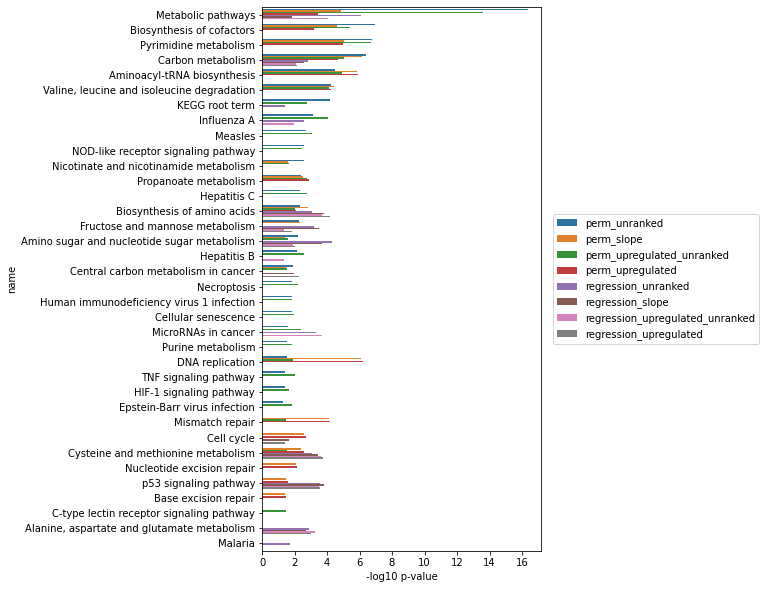

In [190]:
plt.figure(figsize=(5,10))
g = sns.barplot(data = upregulated_pathways_df,
               x = 'p_value', y = 'name', hue = 'Analysis')
g.legend(loc='center right', bbox_to_anchor=(1.8, .5))
plt.xlabel('-log10 p-value')

In [122]:
num_upregulated_analyses = len(pd.unique(upregulated_pathways_df.Analysis))

In [123]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-123-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [124]:
upregulated_pathways = []
upregulated_analyses = []
for pathway in pd.unique(upregulated_pathways_df.name):
    pathway_df = upregulated_pathways_df[upregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in upregulated_analyses:
        upregulated_analyses.append(analyses)
        upregulated_pathways.append({pathway})
    else:
        i = upregulated_analyses.index(analyses)
        upregulated_pathways[i].add(pathway)
upregulated_pathways_df = pd.DataFrame({'Analyses':upregulated_analyses, 'Pathways': upregulated_pathways})
upregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_upregulated_analyses for a in upregulated_pathways_df.Analyses]
upregulated_pathways_df = upregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
upregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
2,"{perm_upregulated, perm_upregulated_unranked, regression_unranked, regression_upregulated, regression_upregulated_unranked, regression_slope, perm_slope, perm_unranked}","{Biosynthesis of amino acids, Carbon metabolism}",1.000
0,"{perm_upregulated, perm_upregulated_unranked, regression_unranked, regression_upregulated_unranked, regression_slope, perm_slope, perm_unranked}",{Metabolic pathways},0.875
13,"{perm_upregulated, perm_upregulated_unranked, regression_unranked, regression_upregulated, regression_upregulated_unranked, regression_slope, perm_slope}",{Cysteine and methionine metabolism},0.875
8,"{perm_upregulated_unranked, regression_unranked, regression_upregulated, regression_upregulated_unranked, regression_slope, perm_slope, perm_unranked}",{Amino sugar and nucleotide sugar metabolism},0.875
15,"{perm_upregulated, regression_unranked, regression_upregulated, regression_upregulated_unranked, regression_slope, perm_slope}",{p53 signaling pathway},0.750
7,"{regression_unranked, regression_upregulated, regression_upregulated_unranked, regression_slope, perm_slope, perm_unranked}",{Fructose and mannose metabolism},0.750
10,"{perm_upregulated_unranked, regression_upregulated, regression_slope, perm_slope, perm_unranked}",{Central carbon metabolism in cancer},0.625
12,"{perm_upregulated, regression_slope, perm_slope, regression_upregulated}",{Cell cycle},0.500
17,"{regression_upregulated, regression_upregulated_unranked, regression_slope, regression_unranked}","{Alanine, aspartate and glutamate metabolism}",0.500
4,"{regression_upregulated_unranked, perm_upregulated_unranked, perm_unranked, regression_unranked}","{Influenza A, MicroRNAs in cancer}",0.500


In [129]:
rows = []
for index, row in upregulated_pathways_df.iterrows():
    pathways = row.Pathways
    for pathway in pathways:
        new_row = dict()
        new_row['Pathway'] = pathway
        new_row['Frequency'] = row.Pathway_Frequency
        rows.append(new_row)
upregulated_pathways_df = pd.DataFrame(rows)
upregulated_pathways_df

,Pathway,Frequency
0,Biosynthesis of amino acids,1.000
1,Carbon metabolism,1.000
2,Metabolic pathways,0.875
3,Cysteine and methionine metabolism,0.875
4,Amino sugar and nucleotide sugar metabolism,0.875
5,p53 signaling pathway,0.750
6,Fructose and mannose metabolism,0.750
7,Central carbon metabolism in cancer,0.625
8,Cell cycle,0.500
9,"Alanine, aspartate and glutamate metabolism",0.500


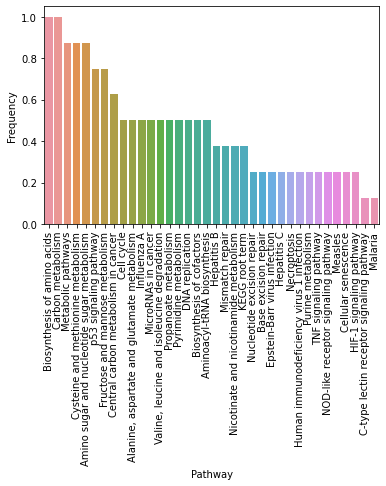

In [133]:
axes = sns.barplot(data = upregulated_pathways_df, x = 'Pathway', y = 'Frequency')
axes.tick_params(axis = 'x', labelrotation = 90)

In [125]:
downregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_downregulated_unranked,sig_perm_downregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_downregulated_unranked,sig_regression_downregulated]
downregulated_pathways_df = pd.concat(downregulated_pathways)
num_downregulated_analyses = len(pd.unique(downregulated_pathways_df.Analysis))

In [126]:
downregulated_pathways = []
downregulated_analyses = []
for pathway in pd.unique(downregulated_pathways_df.name):
    pathway_df = downregulated_pathways_df[downregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in downregulated_analyses:
        downregulated_analyses.append(analyses)
        downregulated_pathways.append({pathway})
    else:
        i = downregulated_analyses.index(analyses)
        downregulated_pathways[i].add(pathway)
downregulated_pathways_df = pd.DataFrame({'Analyses':downregulated_analyses, 'Pathways': downregulated_pathways})
downregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_downregulated_analyses for a in downregulated_pathways_df.Analyses]
downregulated_pathways_df = downregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
downregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
4,"{regression_downregulated, regression_unranked, regression_downregulated_unranked, regression_slope, perm_slope, perm_unranked}",{Amino sugar and nucleotide sugar metabolism},0.750
0,"{regression_slope, perm_slope, perm_unranked, regression_unranked}","{Metabolic pathways, Fructose and mannose metabolism, Biosynthesis of amino acids, Carbon metabolism}",0.500
14,"{regression_downregulated, regression_downregulated_unranked, regression_unranked}",{Malaria},0.375
5,"{regression_slope, perm_slope, perm_unranked}",{Central carbon metabolism in cancer},0.375
8,"{regression_slope, perm_slope, regression_unranked}","{Cysteine and methionine metabolism, p53 signaling pathway}",0.375
7,"{regression_slope, perm_slope}",{Cell cycle},0.250
1,"{perm_slope, perm_unranked}","{Valine, leucine and isoleucine degradation, Propanoate metabolism, Nicotinate and nicotinamide metabolism, Pyrimidine metabolism, DNA replication, Biosynthesis of cofactors, Aminoacyl-tRNA biosynthesis}",0.250
9,"{perm_downregulated, perm_downregulated_unranked}",{Hematopoietic cell lineage},0.250
11,"{perm_downregulated, regression_downregulated}","{Cholesterol metabolism, Phagosome}",0.250
13,"{regression_slope, regression_unranked}","{Alanine, aspartate and glutamate metabolism}",0.250
